In [14]:
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv("C:/Users/radhi/Downloads/GRE_Reg_Data.csv") #load the data

In [139]:
dataset.head(10) #Used to show first 10 rows of the dataset

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex
1,220314085,2022-07-22,2020-05-12,11,27,F
2,222013040,2022-08-06,2020-06-04,16,60,M
3,220614831,2022-08-18,2020-08-17,12,28,M
4,231207725,2023-02-27,2020-01-27,6,37,M
5,220213256,2022-07-14,2020-07-14,9,79,M
6,221216052,2022-07-07,2020-02-23,10,28,F
7,221515929,2022-10-10,2020-04-01,12,33,M
8,231906599,2023-03-03,2020-01-14,13,35,M
9,231207476,2023-02-27,2020-08-15,0,72,M
10,231506571,2023-03-03,2020-07-15,17,21,F


In [140]:
dataset.info() # Check the information about the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
Index: 215740 entries, 1 to 247987
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   REGISTRATION_NO   215740 non-null  int64         
 1   Date Registered   215740 non-null  datetime64[ns]
 2   DATE OF EXAM OCC  215740 non-null  datetime64[ns]
 3   TIME OCC          215740 non-null  int64         
 4   Age               215740 non-null  int64         
 5   Sex               215740 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.5+ MB


In [26]:
dataset.isnull().sum() #It will count the number of missing values present in columns and showing 0 because we have deleted all null in the next line of code

REGISTRATION_NO     0
Date Registered     0
DATE OF EXAM OCC    0
TIME OCC            0
Age                 0
Sex                 0
dtype: int64

In [50]:
dataset.dropna(inplace=True) # it will delete all the mising values,and all the 0's and inplace =true is used because we changed into original data

In [52]:
dataset["Date Registered"] # date donot follow the same format

1        2022-07-22
3        2022-08-18
4        2023-02-27
5        2022-07-14
9        2023-02-27
            ...    
247977   2023-05-29
247979   2023-06-14
247983   2023-05-29
247984   2023-01-27
247985   2023-03-22
Name: Date Registered, Length: 125555, dtype: datetime64[ns]

In [51]:
dataset['Date Registered'] = pd.to_datetime(dataset['Date Registered'], format='mixed') #using to_datetime method is used and convert all the dates in same format 

In [54]:
dataset['DATE OF EXAM OCC'] = pd.to_datetime(dataset['DATE OF EXAM OCC'], format='mixed') # we convert the datetime format

In [137]:
dataset['TIME OCC'] = dataset['TIME OCC'] // 100 # extracting hour from time occ by using floor division
# the given data is like 1200->1500//100=15(3 pm) which is 24 hour format
# after applying all data is cleaned

In [138]:
hour_frequency = dataset.groupby('TIME OCC').size().sort_index()#groupby()-grouped each unique hour value and
#the size() - created index and the values are the counts of occurence of each hour,
#sort()-to ensure that it is asc order

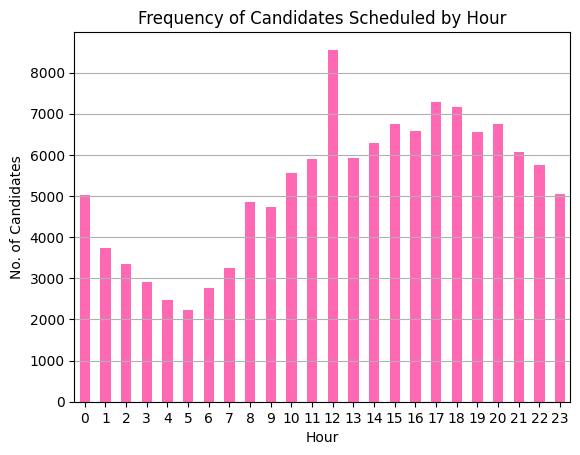

In [87]:
hour_frequency.plot(kind='bar',color="hotpink") # create a bar with a color
plt.xlabel('Hour') # used to give x-label
plt.ylabel('No. of Candidates') # used to give y-label
plt.title('Frequency of Candidates Scheduled by Hour') # show a title
plt.xticks(rotation=0) # fixed the x rotation such that it cannot move and read easily
plt.grid(axis='y')  # add gridlines 
plt.show() # to shown on a screen

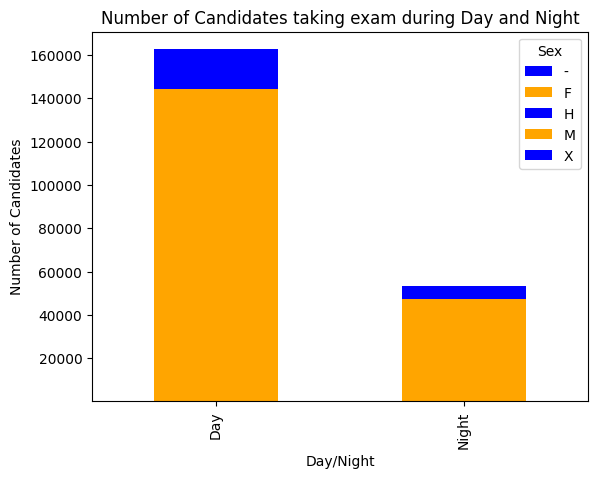

In [160]:
#This line creates another new column 'Day_Night' and 
#The lambda function checks if the hour is between 6 and 21; if it is, it returns 'Day', otherwise it returns 'Night'.
dataset['Day_Night'] = dataset['TIME OCC'].apply(lambda x: 'Day' if 6 <= x <= 21 else 'Night')
#  Group by 'Day_Night' and 'Sex' and count the occurrences
grouped_data = dataset.groupby(['Day_Night', 'Sex']).size().unstack().fillna(0)

# Plot a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.xlabel('Day/Night')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates taking exam during Day and Night')
plt.show()


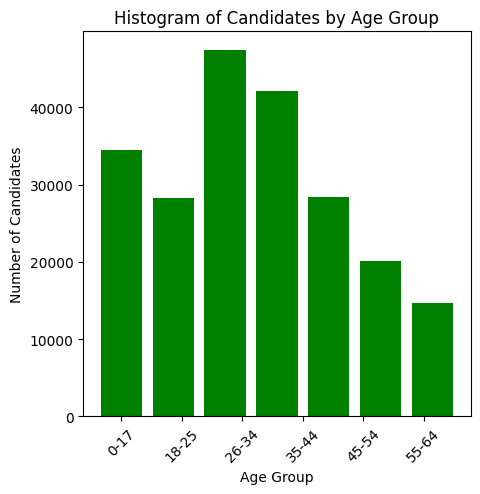

In [167]:
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')] #defines the age ranges and float('inf') which represents infinity.
#contains the labels for each age range.
labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
#pd.cut() function to create a new column in the dataset called 'Age Group'.
#assigns each age in the dataset to one of the age ranges defined in the bins list. 
#The labels list is used to assign the corresponding label to each age range
dataset['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, include_lowest=True)

# Calculate the frequency of candidates in each age group
age_group_counts = dataset['Age Group'].value_counts().sort_index()

# Create a histogram
plt.figure(figsize=(5, 5))
plt.hist(age_group_counts.index, weights=age_group_counts.values, bins=len(age_group_counts), align='left', rwidth=0.8 , color="green")
plt.xlabel('Age Group')
plt.ylabel('Number of Candidates')
plt.title('Histogram of Candidates by Age Group')
#rotates the x-axis labels by 45 degrees to make them easier to read.
plt.xticks(rotation=45)
plt.show()